## Inverse cdf trick

This notebook draws from a uniform distribution to form draws from a desired target distribution

The target distribution is the histogram from a large number of N independent  draws from a gamma distribution

It is easy for you to change the "target distribution"

The next cell creates the target distribution

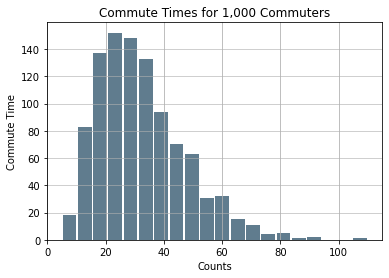

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Generate data on commute times.
# where commute times are draws from a gamma distribution
size, scale = 1000, 10
commutes = pd.Series(np.random.gamma(scale, size=size) ** 1.5)

commutes.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Commute Times for 1,000 Commuters')
plt.xlabel('Counts')
plt.ylabel('Commute Time')
plt.grid(axis='y', alpha=0.75)

### inverse cdf function

I borrowed this program from a source on the internet.

Also, take a look at this site

http://people.duke.edu/~ccc14/sta-663-2016/15A_RandomNumbers.html

and

http://karlrosaen.com/ml/notebooks/simulating-random-variables/



In [18]:
import numpy as np
import scipy.interpolate as interpolate

def inverse_transform_sampling(data, n_bins=40, n_samples=20000):
    """This function forms the target distribution from the histogram of an numpy array that we call data.
    It then takes a number n_samples independent draws u from a uniform [0,1]
    distribution and then applies the inverse cdf transform to sample from the target distribution. """
    hist, bin_edges = np.histogram(data, bins=n_bins, density=True)
    cum_values = np.zeros(bin_edges.shape)
    cum_values[1:] = np.cumsum(hist*np.diff(bin_edges))
    inv_cdf = interpolate.interp1d(cum_values, bin_edges)
    u = np.random.rand(n_samples)
    return u, inv_cdf(u) 

In [19]:
u, r = inverse_transform_sampling(commutes)

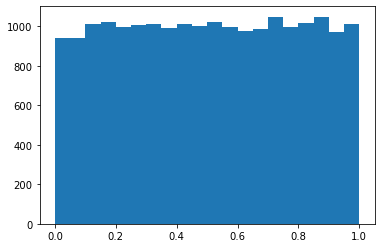

In [20]:
# plot the uniform random draws
plt.hist(u, bins = 20)
plt.show()

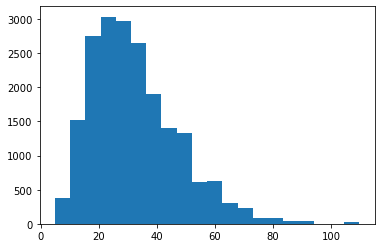

In [21]:
# plot the implied draws from the constructed inverse cdf for our target distribution
plt.hist(r, bins = 20)
plt.show()

Please compare the above articial sample with our "target distribution" earlier in the notebook